
# <span style="color:rgb(213,80,0)">Univariate analysis of the response for dataset Income1.</span>

This file creates Figures 1.2 \-\-\-\-\- 1.5 and Tables 1.1, 1.2.

## Data loading

In [1]:
clear
close all
load Income1

% y  in array format
y=Income1{:,"HTOTVAL"};

% y in table format
yt=Income1(:,end);

n=length(y);
one=ones(n,1);

FontSize=14;
prin=0;

## Create Figure 1.2

histogram and boxplot; positive skewness is evident in both panels.



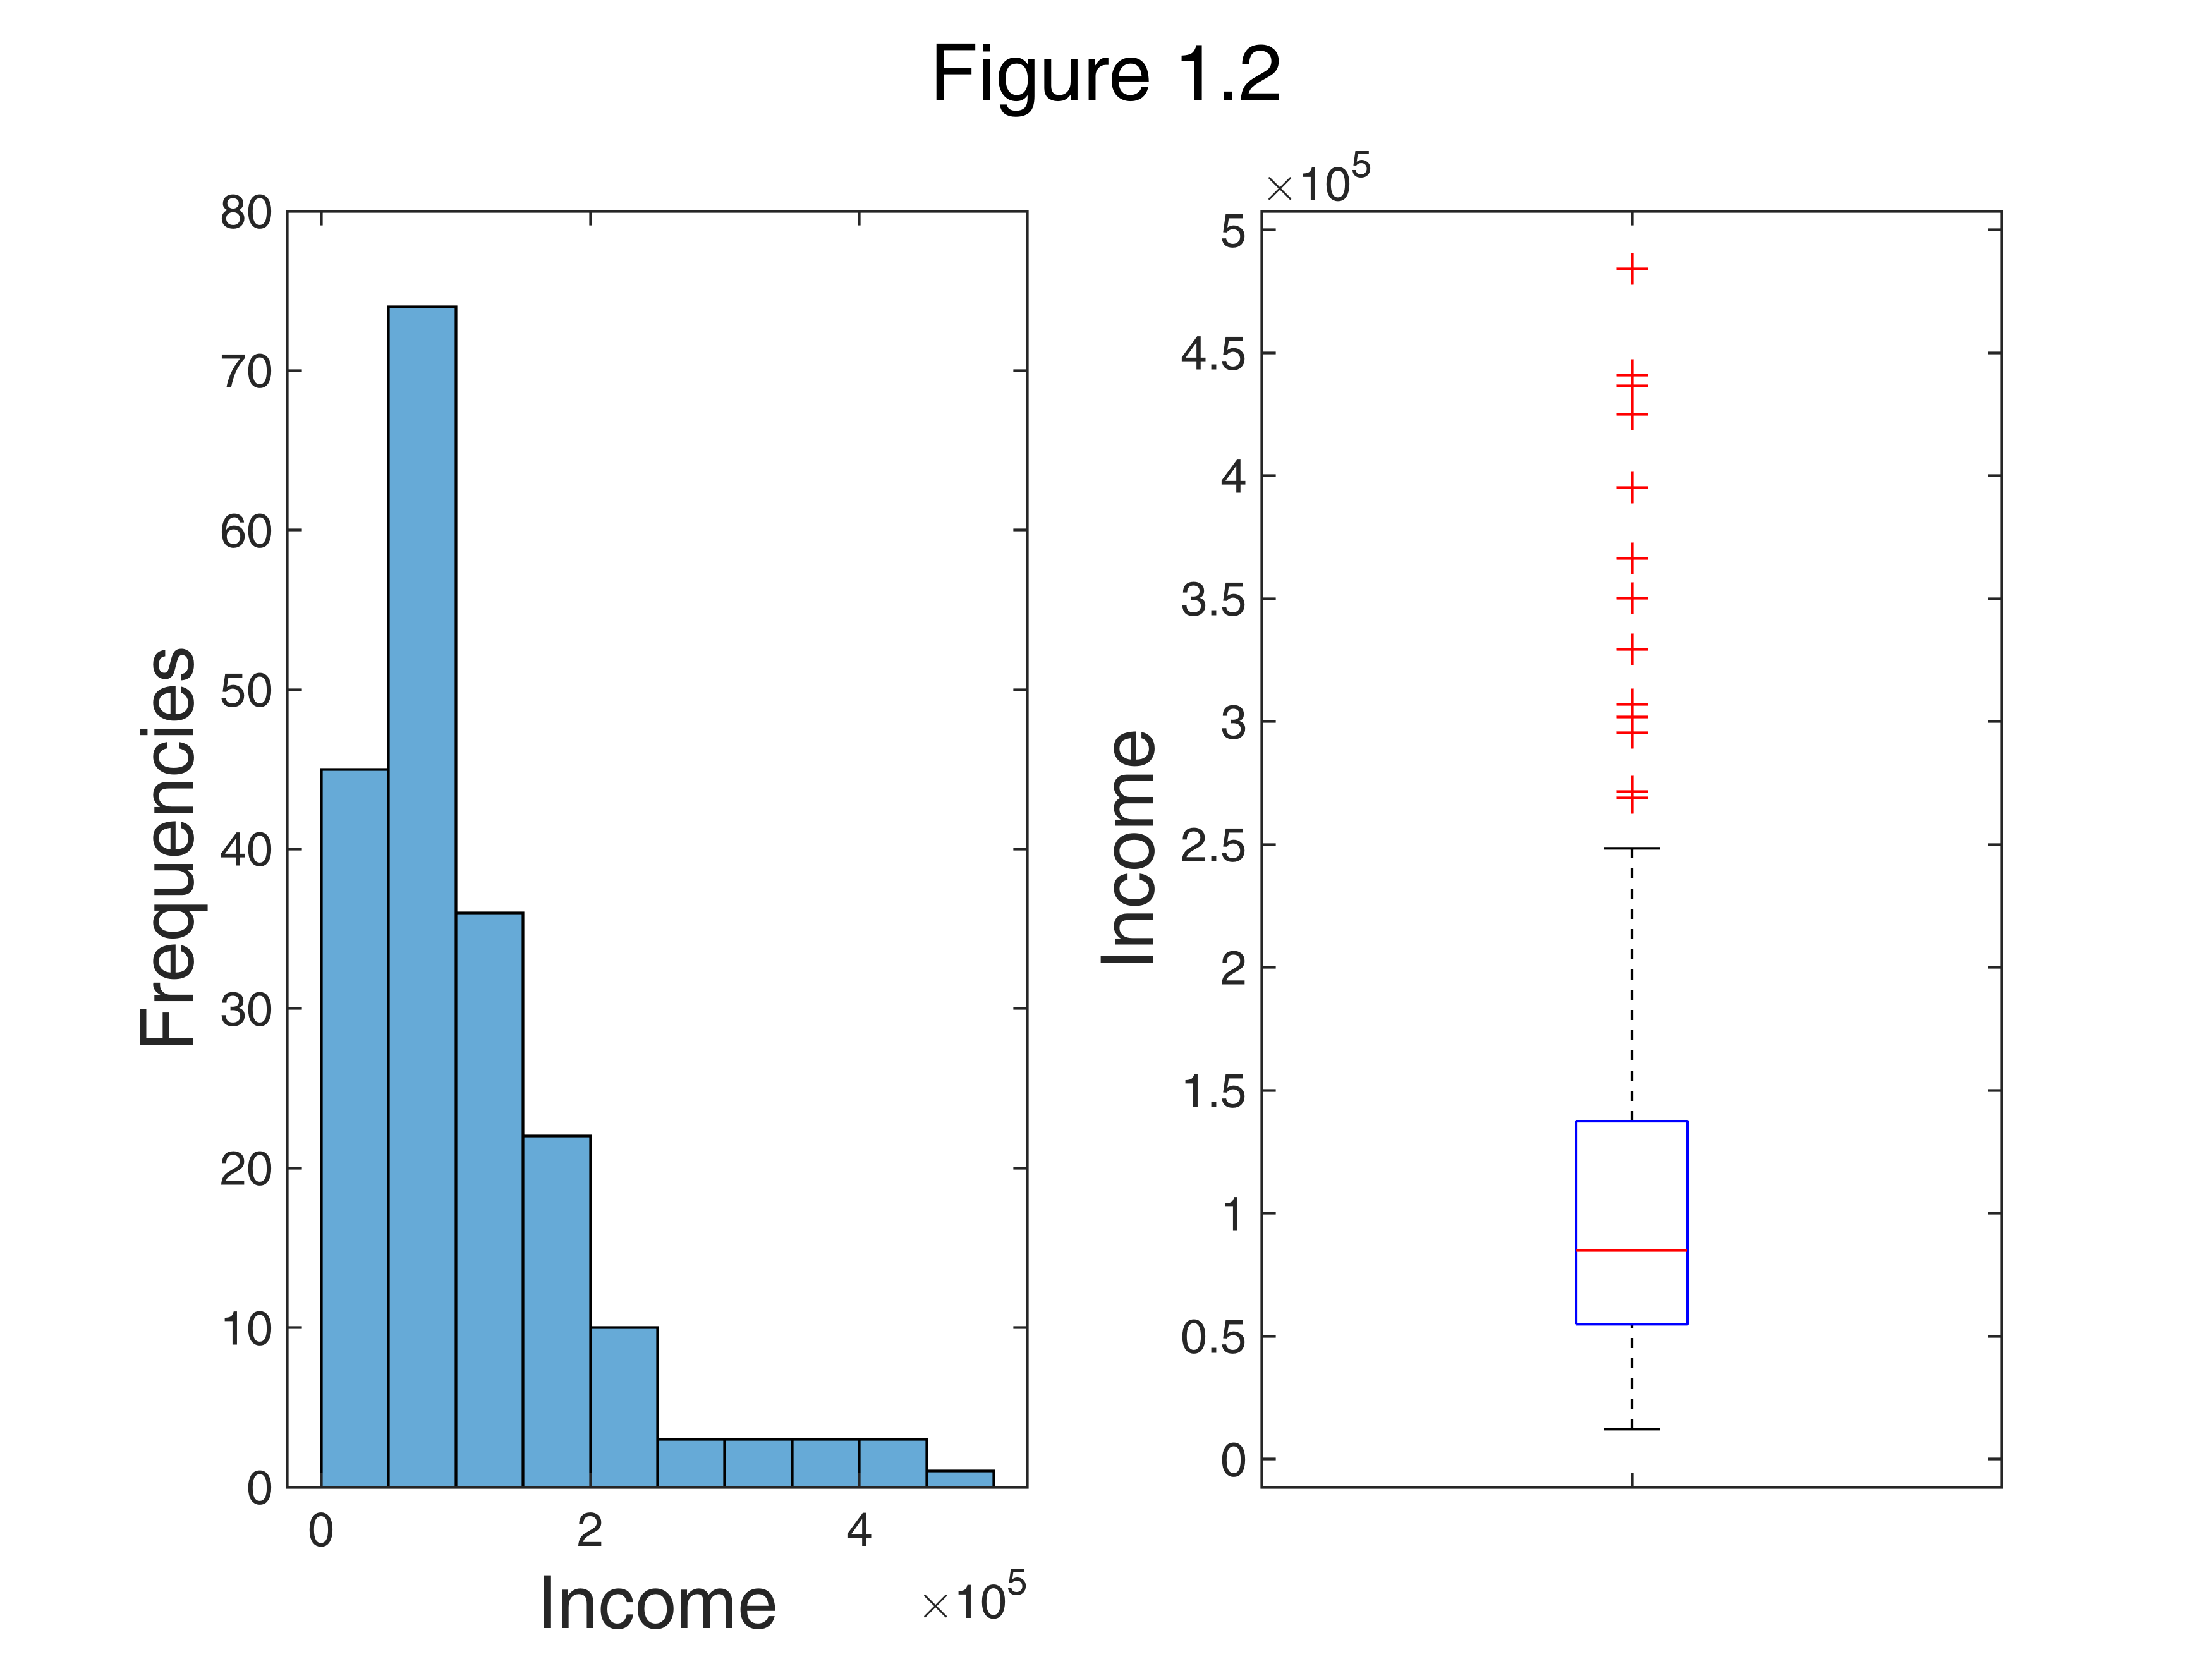

In [2]:
subplot(1,2,1)
histogram(y)
xlabel('Income','FontSize',FontSize)
ylabel('Frequencies','FontSize',FontSize)
subplot(1,2,2)
boxplot(y,'Labels',{''})
ylabel('Income','FontSize',FontSize)
if prin==1
    % print to postscript
    print -depsc histbox.eps;
else
    sgtitle('Figure 1.2')
    set(gcf,"Name",'Figure 1.2')
end

## Create Figure 1.3

Boxplots for four value of lambda using the normalized Box Cox power transformation after preliminary rescaling of the data to a maximum value of one.



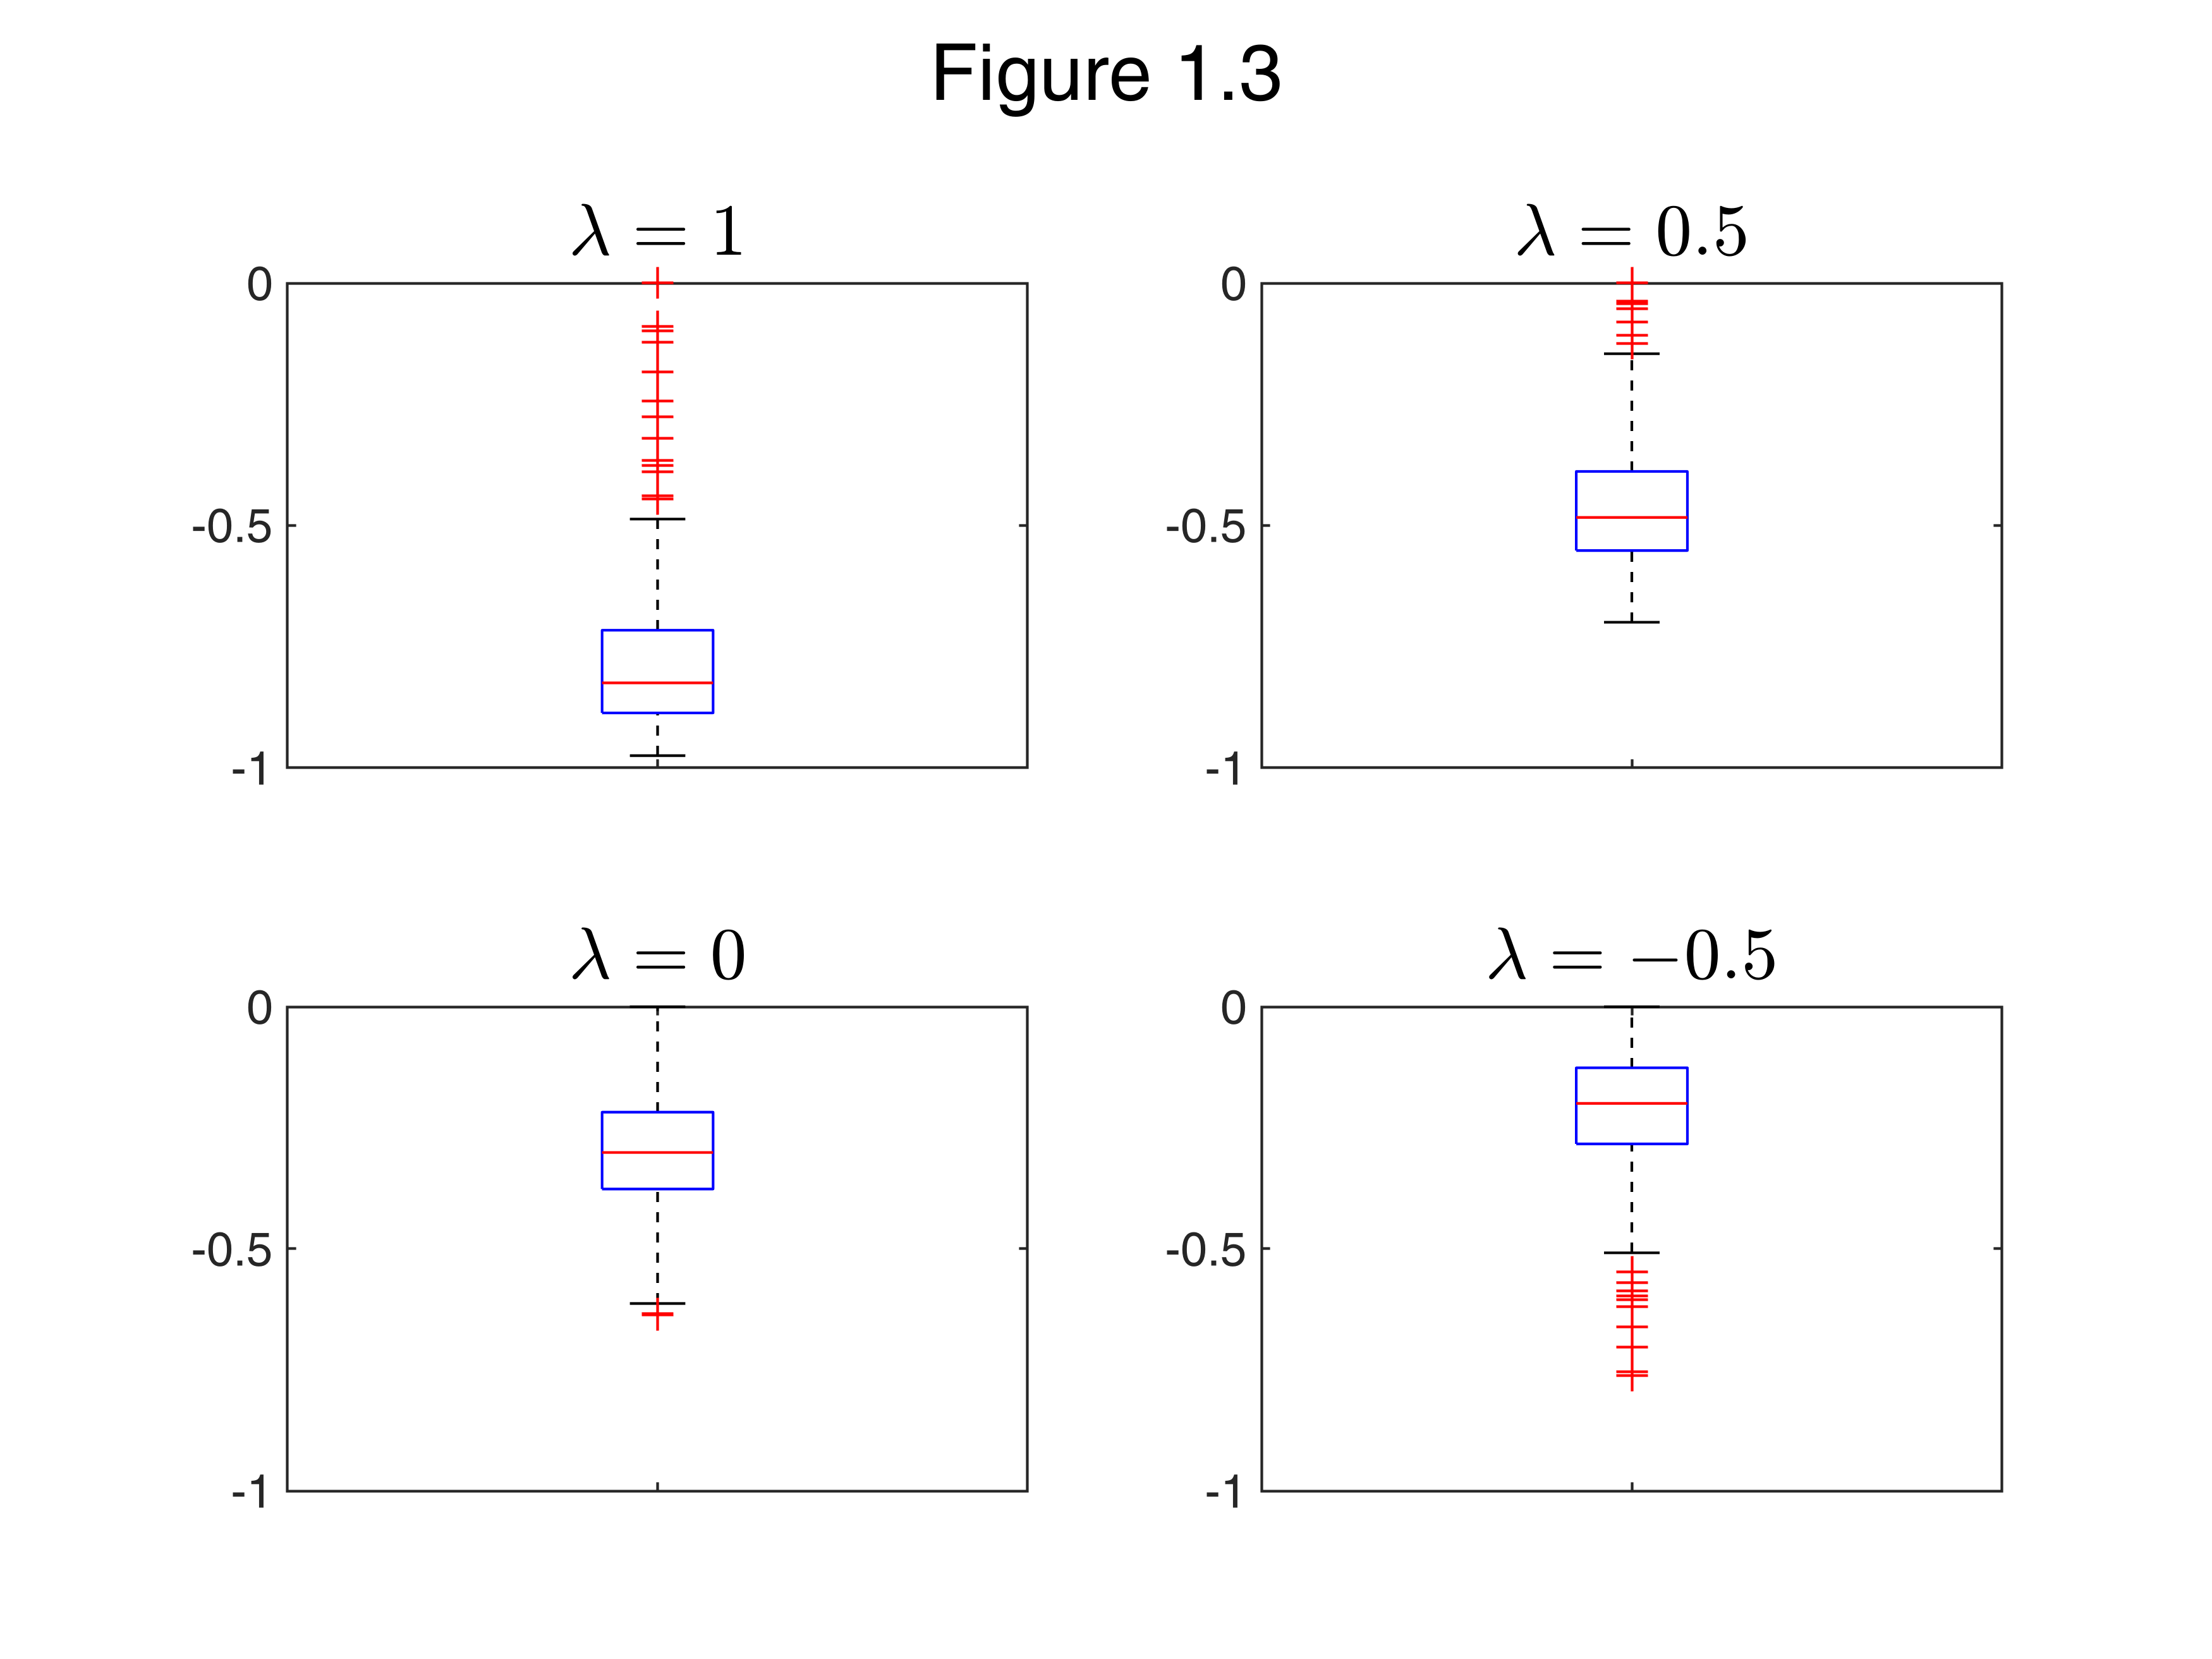

In [3]:
yl1=-1;
yl2=0;
yrs=y/max(y);
figure
subplot(2,2,1)
ytra=normBoxCox(yrs,1,1,'Jacobian',true);
boxplot(ytra,'Labels',{''})
title(' $\lambda=1$ ','Interpreter','latex','FontSize',FontSize)
ylim([yl1 yl2])

subplot(2,2,2)
ytra=normBoxCox(yrs,1,0.5,'Jacobian',true);
boxplot(ytra,'Labels',{''})
title(' $\lambda=0.5$ ','Interpreter','latex','FontSize',FontSize)
ylim([yl1 yl2])

subplot(2,2,3)
ytra=normBoxCox(yrs,1,0,'Jacobian',true);
boxplot(ytra,'Labels',{''})
title(' $\lambda=0$ ','Interpreter','latex','FontSize',FontSize)
ylim([yl1 yl2])

subplot(2,2,4)
ytra=normBoxCox(yrs,1,-0.5,'Jacobian',true);
boxplot(ytra,'Labels',{''})
title(' $\lambda=-0.5$ ','Interpreter','latex','FontSize',FontSize)
ylim([yl1 yl2])

if prin==1
    % print to postscript
    print -depsc boxla.eps;
else
    sgtitle('Figure 1.3')
    set(gcf,"Name",'Figure 1.3')
end

## Create Table 1.1

Analysis of the score test


In [4]:
la=[-1, -0.5, 0, 0.5, 1];
out=Score(y,one, 'la', la,'intercept',false);

Score1=out.Score;
rownam=["Inverse" "Reciprocal square root" "Logarithmic" "Square root" "None"];
colnam=["lambda" "Score test"];

ScoreT=array2table([la' Score1],"RowNames",rownam,"VariableNames",colnam);
format bank
disp("Table 1.1")

Table 1.1

In [5]:
disp(ScoreT)

                              lambda    Score test
                              ______    __________
    Inverse                   -1.00        25.68  
    Reciprocal square root    -0.50        12.91  
    Logarithmic                0.00         1.61  
    Square root                0.50        -9.46  
    None                       1.00       -21.68

## Create Table 1.2

Descriptive statistics Table 1.2


In [6]:
ysor=sort(y);

alpha=0.10;
m=floor((n-1)*alpha);
meanTri=mean(ysor(m+1:n-m));
% meanTriCHK=trimmean(y,100*alpha)
mea=mean(y);
medi=median(y);
sta=std(y);
consfact=1/norminv(0.75);
madn=consfact*mad(y,1);

loc=[mea; meanTri; medi; sta; madn];

y1=log(y);
ysor1=sort(y1);
meanTri1=mean(ysor1(m+1:n-m));
mea1=mean(y1);
medi1=median(y1);
sta1=std(y1);
madn1=consfact*mad(y1,1);

loc1=[mea1; meanTri1; medi1; sta1; madn1];

LOC=[loc loc1];
rn=["Mean" "Trimmed mean" "Median" "Standard Deviation" "MADN"];
rc=["Original data" "logged data"];
LOCt=array2table(LOC,'RowNames',rn,'VariableNames',rc);
disp("Table 1.2")

Table 1.2

In [7]:
disp(LOCt)

                          Original data    logged data
                          _____________    ___________
    Mean                    109557.52         11.33   
    Trimmed mean             95172.62         11.34   
    Median                   84881.00         11.35   
    Standard Deviation       86394.86          0.75   
    MADN                     63084.72          0.70

## Prepare input for Figure 1.4

Trimmed mean monitoring


In [8]:
alphaAll=(0:0.01:0.5)';
lalphaAll=length(alphaAll);
meanTru=zeros(lalphaAll,1);
% meanTru1=meanTru;
ysor=sort(y);
for i=1:lalphaAll
    m=floor((n-1)*alphaAll(i));
    meanTru(i)=mean(ysor(m+1:n-m));
    % meanTru1(i)=trimmean(y,100*alphaAll(i));
end

## Create Figure 1.4

Monitoring of the trimmed mean



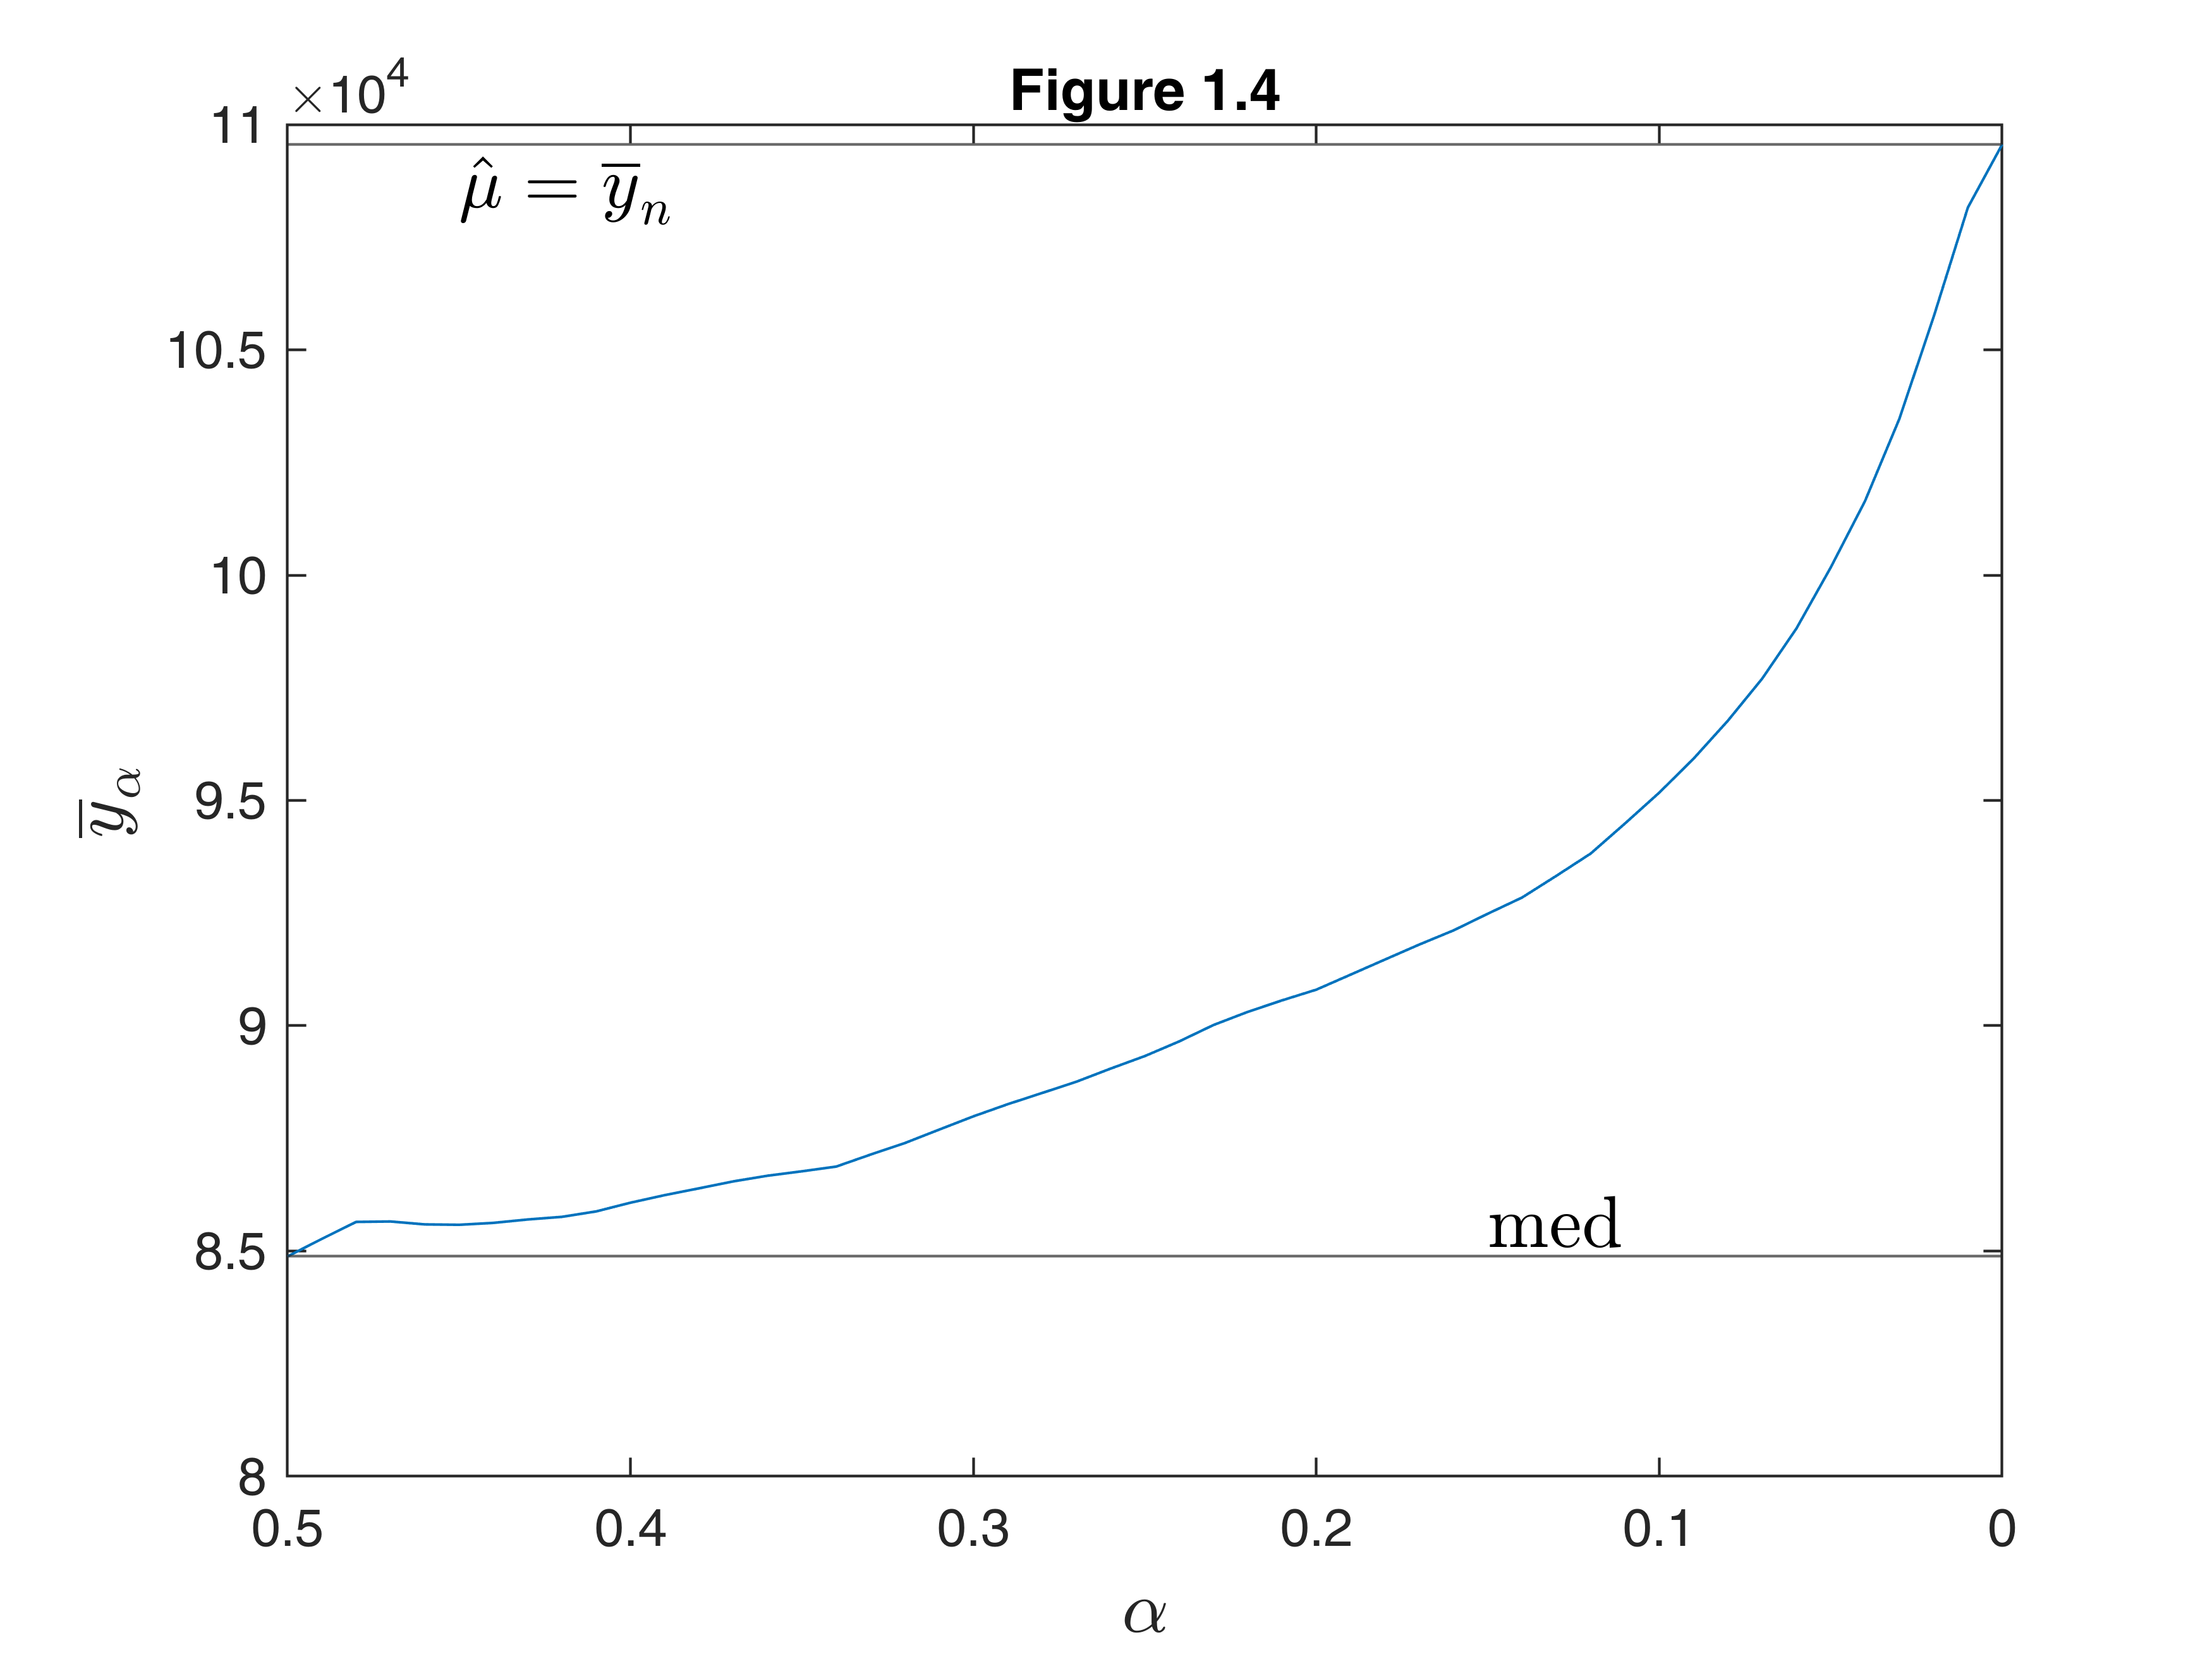

In [9]:
figure
plot(alphaAll,meanTru)
xlabel('\alpha','FontSize',FontSize)
xlim([0 0.5])
meany=mean(y);
mediany=median(y);
yline(meany)
yline(mediany)
ylabel(' $\overline y_\alpha$ ','Interpreter','latex','FontSize',FontSize)
text(0.45,meany-1000," $\hat \mu = \overline y_n$ ",'Interpreter','latex','FontSize',FontSize)
text(0.15,mediany+600,"med",'Interpreter','latex','FontSize',FontSize)

set(gca,"XDir","reverse")

if prin==1
    % print to postscript
    print -depsc trimmeanIncome1.eps;
else
    title('Figure 1.4')
    set(gcf,"Name",'Figure 1.4')

end

## Create Figure 1.5 fanplot

Fanplot using just the intercept


In [10]:
outFSRfanUNI=FSRfan(y,one,'intercept',0,'ylimy',[-24 26],'nsamp',0);

Total estimated time to complete LMS:  0.08 seconds 
Total estimated time to complete LMS:  0.08 seconds 
Total estimated time to complete LMS:  0.01 seconds 
Total estimated time to complete LMS:  0.00 seconds 
Total estimated time to complete LMS:  0.00 seconds


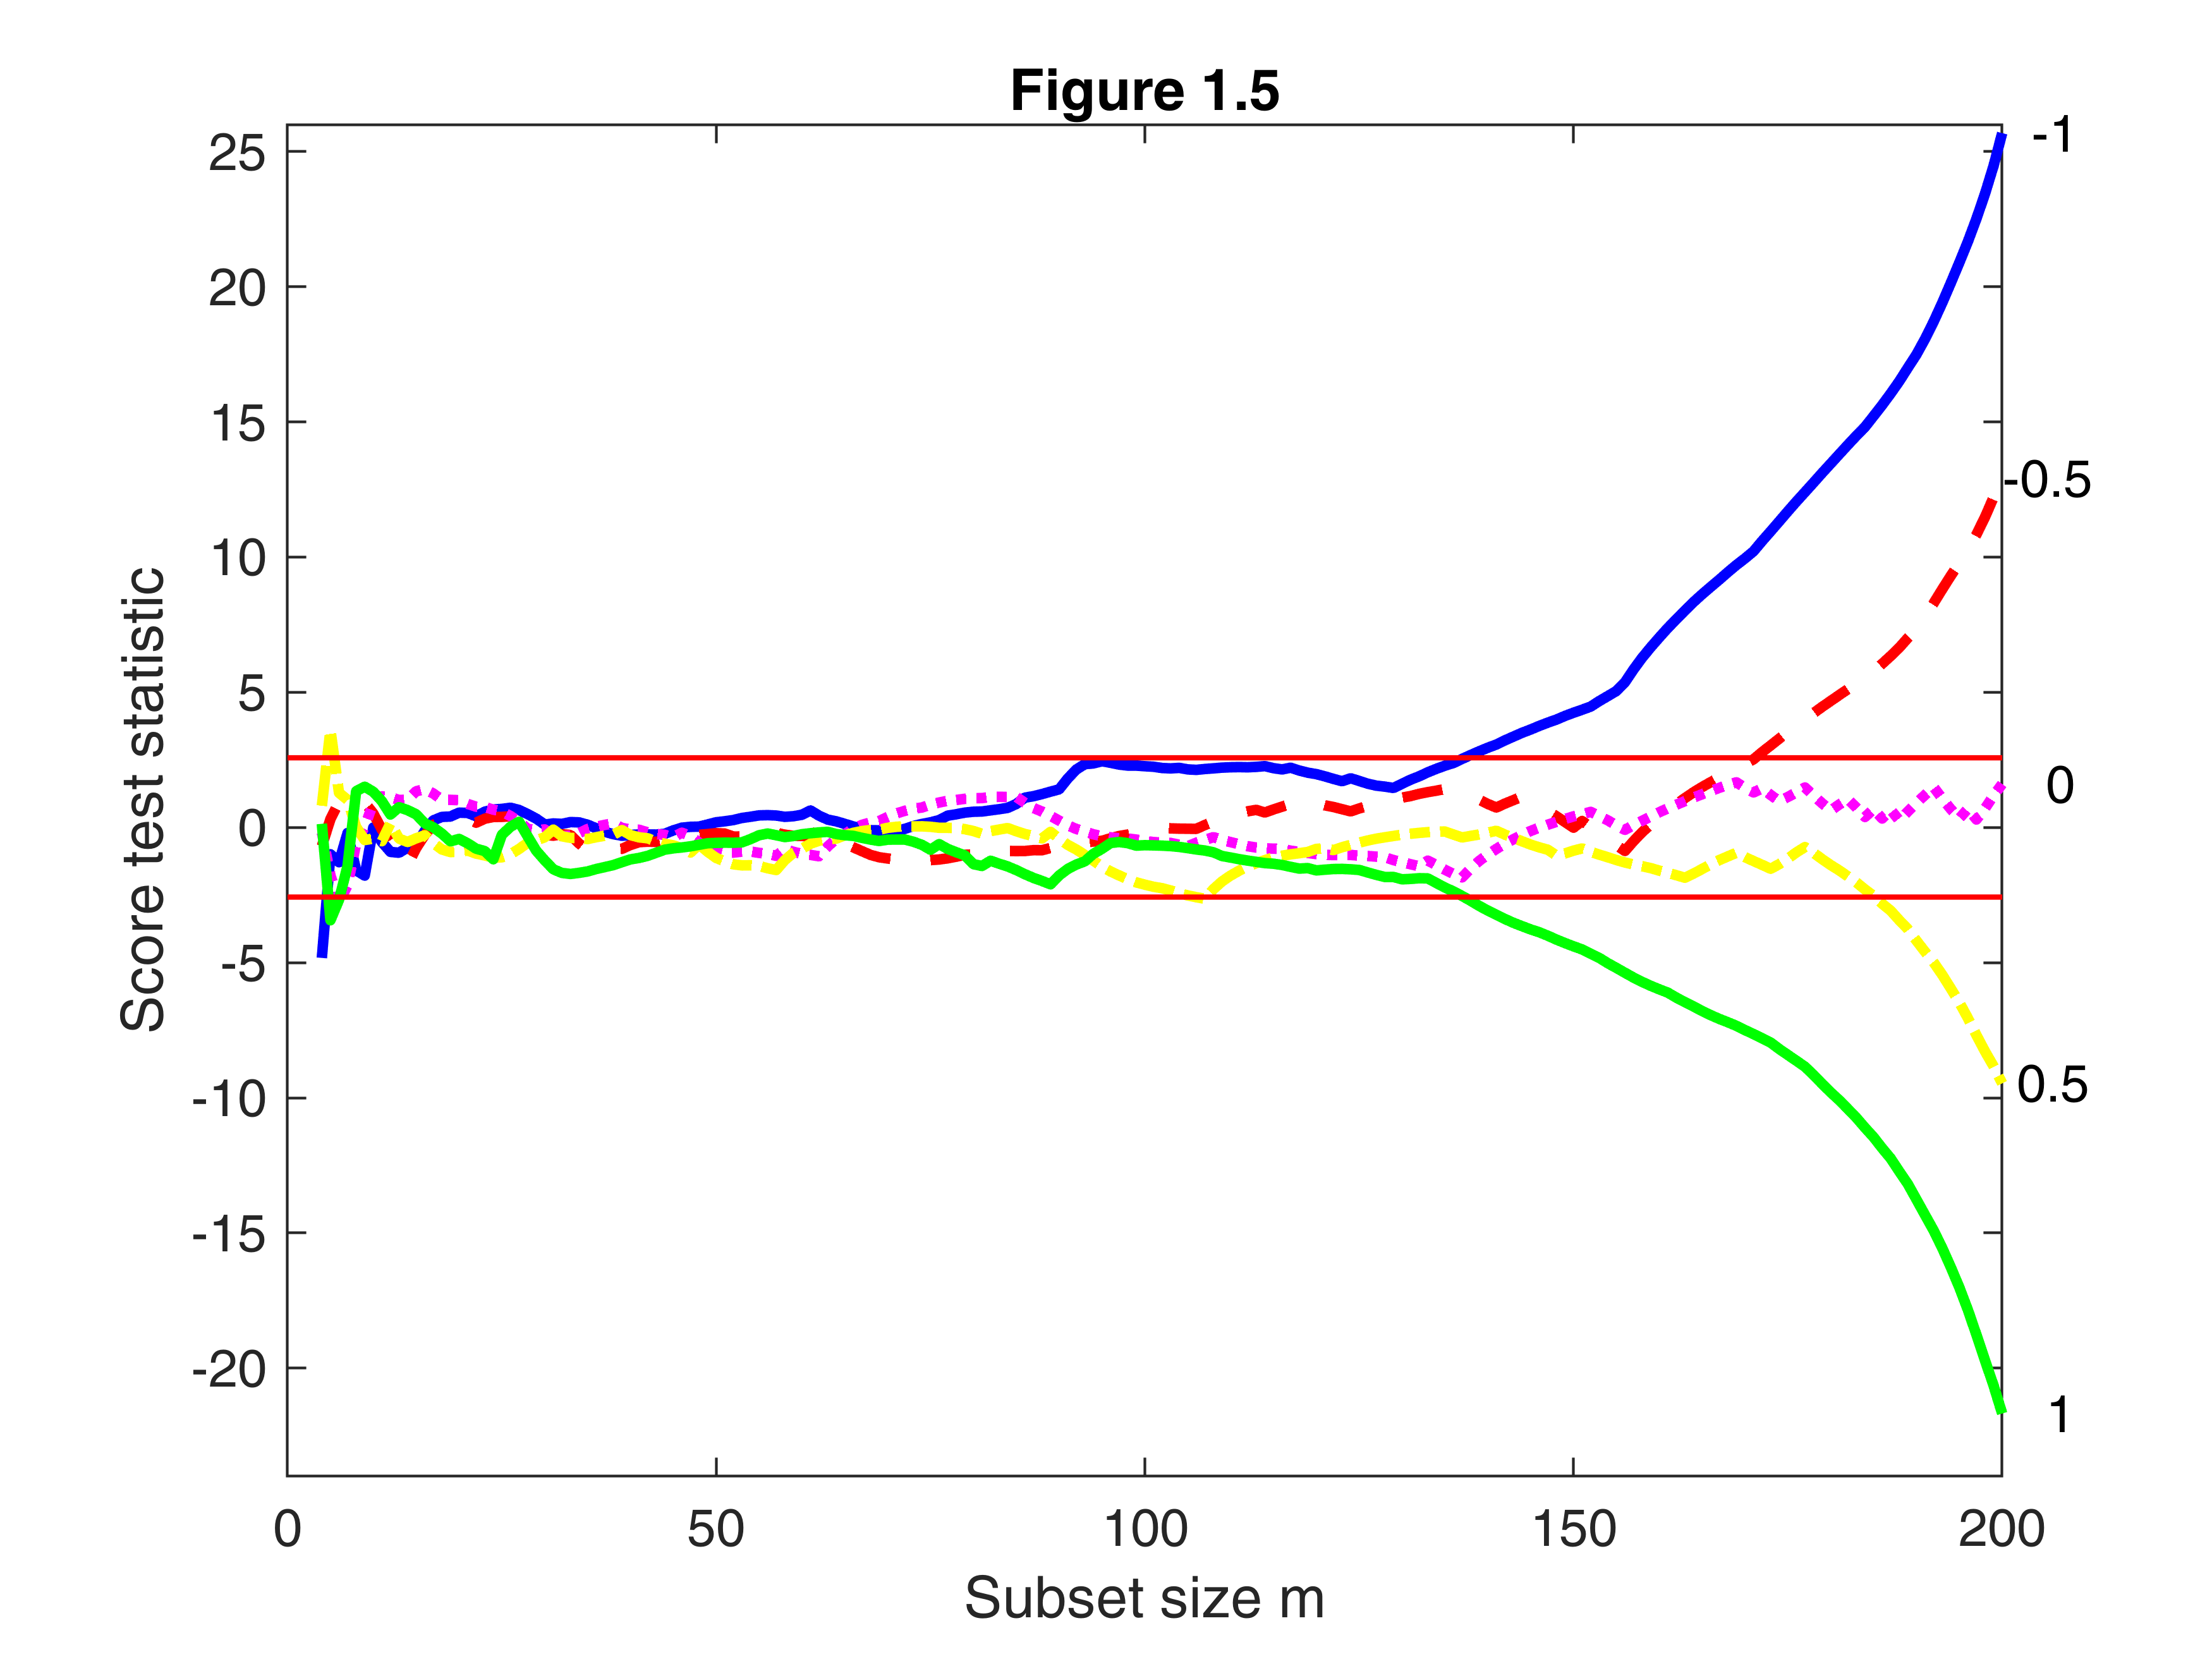

In [11]:

if prin==1
    % print to postscript
    print -depsc fanIncome1.eps;
else
    title('Figure 1.5')
    set(gcf,"Name",'Figure 1.5')

end

## Visual display of the trimmed mean calling GUItrimmedmean

Note that given that GUItrimmean trims alpha72 from both tails it is necessary to use (2\*alpha)\*100=20 to have the 10 per cent trimmed mean


In [12]:
%{
    y15=y(1:15);
    outTRI=GUItrimmean(y15,20);
    disp("Trimmed mean alpha=0.10 using call to GUItrimmean")
    disp(outTRI.trimmedmean)
%}

%InsideREADME